In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Devices.csv')
df.head(20)

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device
0,0,55,2.70432,8.0,0.003666,35,M,179.0,5.6,1.Sedentary,Fitbit
1,1,54,2.92968,13.0,0.006027,35,M,179.0,5.6,1.Sedentary,Fitbit
2,2,59,2.70432,9.0,0.004163,35,M,179.0,5.6,1.Sedentary,Fitbit
3,3,58,2.70432,11.0,0.005095,35,M,179.0,5.6,1.Sedentary,Fitbit
4,4,58,1.12680,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit
5,5,60,1.23948,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit
6,6,62,2.25360,40.0,0.018517,35,M,179.0,5.6,1.Sedentary,Fitbit
7,7,65,3.15504,37.0,0.017150,35,M,179.0,5.6,1.Sedentary,Fitbit
8,8,71,3.15504,80.0,0.037096,35,M,179.0,5.6,1.Sedentary,Fitbit
9,9,81,6.76080,114.0,0.052879,35,M,179.0,5.6,1.Sedentary,Fitbit


In [2]:
df['Activity'].value_counts()

Activity
1.Sedentary    45717
0.Sleep        28488
2.Light         2676
3.Moderate      1525
4.Vigorous       180
Name: count, dtype: int64

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics



In [4]:
binary = df
binary['sleep'] = np.where((binary['Activity'] == '0.Sleep'), 'Sleep', 'Awake')
binary['sleep'].value_counts()

sleep
Awake    50098
Sleep    28488
Name: count, dtype: int64

In [5]:
binary[binary['sleep'] == 'Sleep']

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device,sleep
127,127,85,3.605760,10.0,0.004598,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
128,128,67,1.126800,0.0,0.000000,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
129,129,58,1.126800,0.0,0.000000,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
130,130,58,1.126800,0.0,0.000000,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
131,131,58,1.126800,0.0,0.000000,35,M,179.0,5.6,0.Sleep,Fitbit,Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...
78552,78552,75,0.421040,8.0,6.902514,25,M,189.5,5.5,0.Sleep,Apple Watch,Sleep
78553,78553,76,0.721732,2.0,1.852324,25,M,189.5,5.5,0.Sleep,Apple Watch,Sleep
78554,78554,76,0.209887,2.0,1.852324,25,M,189.5,5.5,0.Sleep,Apple Watch,Sleep
78555,78555,77,0.099254,2.0,1.852324,25,M,189.5,5.5,0.Sleep,Apple Watch,Sleep


In [6]:
binary_copy = binary.copy()

In [7]:
one_hot = pd.get_dummies(binary_copy['sleep'], dtype='int')
# Drop column B as it is now encoded
binary_copy = binary_copy.drop('sleep',axis = 1)
# Join the encoded df
binary_copy = binary_copy.join(one_hot)


In [8]:
one_hot = pd.get_dummies(binary_copy['Gender'], dtype='int')
# Drop column B as it is now encoded
binary_copy = binary_copy.drop('Gender',axis = 1)
# Join the encoded df
binary_copy = binary_copy.join(one_hot)


In [9]:
one_hot = pd.get_dummies(binary_copy['Device'], dtype='int')
# Drop column B as it is now encoded
binary_copy = binary_copy.drop('Device',axis = 1)
# Join the encoded df
binary_copy = binary_copy.join(one_hot)
binary_copy.head()

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Weight,Height,Activity,Awake,Sleep,F,M,Apple Watch,Fitbit
0,0,55,2.70432,8.0,0.003666,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1
1,1,54,2.92968,13.0,0.006027,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1
2,2,59,2.70432,9.0,0.004163,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1
3,3,58,2.70432,11.0,0.005095,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1
4,4,58,1.12680,0.0,0.000000,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1


In [10]:
binary['Age'].value_counts()

Age
31    11406
22    10841
36     9310
23     7221
24     7068
40     6212
41     5610
26     4340
35     4055
44     3560
21     3364
38     1896
33     1769
34     1471
42      360
25      103
Name: count, dtype: int64

In [11]:
def cat1(value):
    if value > 40:
        return "40+"
    elif value > 30:
        return "30-40"
    else:
        return "20-30"
binary_copy['age group'] = binary_copy.apply(lambda row: cat1(row['Age']), axis = 1)

In [12]:
binary_copy.head()

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Weight,Height,Activity,Awake,Sleep,F,M,Apple Watch,Fitbit,age group
0,0,55,2.70432,8.0,0.003666,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40
1,1,54,2.92968,13.0,0.006027,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40
2,2,59,2.70432,9.0,0.004163,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40
3,3,58,2.70432,11.0,0.005095,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40
4,4,58,1.12680,0.0,0.000000,35,179.0,5.6,1.Sedentary,1,0,0,1,0,1,30-40


In [13]:
binary_copy['age group'].value_counts()

age group
30-40    36119
20-30    32937
40+       9530
Name: count, dtype: int64

In [14]:
twenties = binary_copy[binary_copy['age group'] == '20-30']
thirties = binary_copy[binary_copy['age group'] == '30-40']
forties = binary_copy[binary_copy['age group'] == '40+']

twenties_sampled = twenties.sample(n=10000, random_state=2024)
thirties_sampled = thirties.sample(n=10000, random_state=2024)
agesconcat = pd.concat([twenties_sampled, thirties_sampled, forties])

In [15]:
X = agesconcat[['Heart', 'Calories','Steps', 'Distance', 'Awake', 'Sleep', 'F', 'M', 'Apple Watch', 'Fitbit']]
y = agesconcat['age group']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 2024)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from itertools import cycle
import matplotlib.pyplot as plt

In [18]:
target = label_binarize(y,
                        classes=['20-30', '30-40', '40+'])
target[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size= 0.2, random_state = 2024)

model_1 = LogisticRegression(random_state=0).fit(X_train, y_train[:, 0])
model_2 = LogisticRegression(random_state=0).fit(X_train, y_train[:, 1])
model_3 = LogisticRegression(random_state=0).fit(X_train, y_train[:, 2])

In [20]:
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(X_test, y_test[:, 0])}")
print(f"model 2 - {model_2.score(X_test, y_test[:, 1])}")
print(f"model 3 - {model_3.score(X_test, y_test[:, 2])}")

Model Accuracy :
model 1 - 0.81544192346766
model 2 - 0.6786318997629529
model 3 - 0.7255333559092448


In [21]:
model = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train)
prob_test_vec = model.predict_proba(X_test)
 
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

[0.8624838028837758, 0.656813761421166, 0.8054927670368176]

In [22]:
sum(auc_score) / n_classes

0.7749301104472531

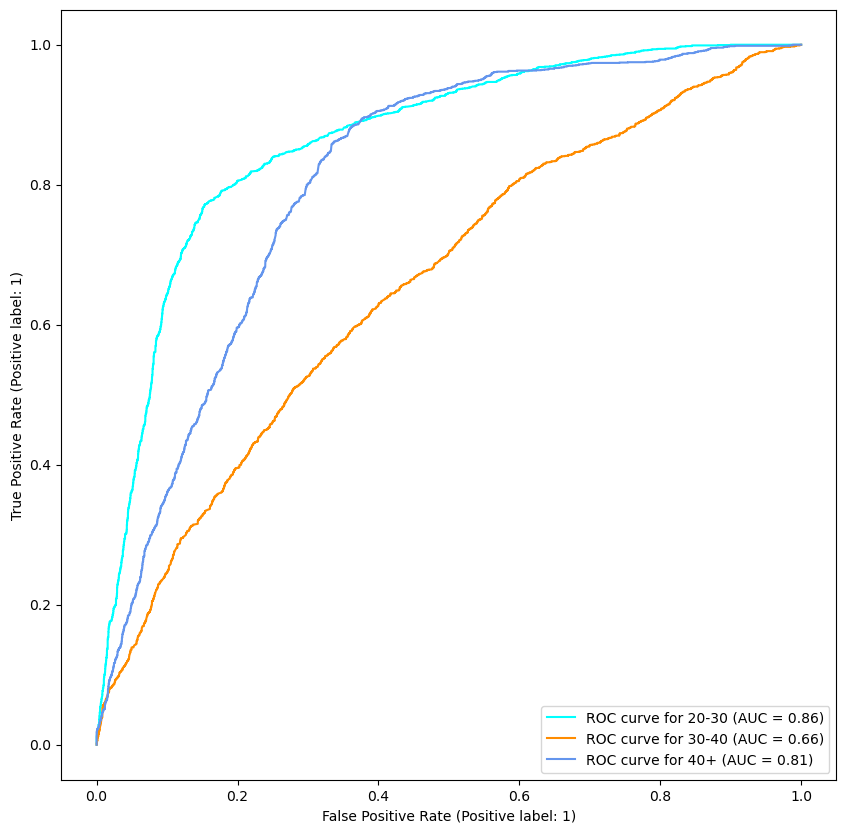

In [23]:

fig, ax = plt.subplots(figsize=(10, 10))
target_names = ['20-30', '30-40', '40+']
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

In [24]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size= 0.2, random_state = 2024)

model_1 = RandomForestClassifier(random_state=0).fit(X_train, y_train[:, 0])
model_2 = RandomForestClassifier(random_state=0).fit(X_train, y_train[:, 1])
model_3 = RandomForestClassifier(random_state=0).fit(X_train, y_train[:, 2])

In [25]:
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(X_test, y_test[:, 0])}")
print(f"model 2 - {model_2.score(X_test, y_test[:, 1])}")
print(f"model 3 - {model_3.score(X_test, y_test[:, 2])}")

Model Accuracy :
model 1 - 0.8586183542160515
model 2 - 0.754148323738571
model 3 - 0.8193362682018287


In [27]:
model = OneVsRestClassifier(RandomForestClassifier(random_state=0)).fit(X_train, y_train)
prob_test_vec = model.predict_proba(X_test)
 
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

[0.9167445251449698, 0.811205555523322, 0.8993908588881843]

In [28]:
sum(auc_score) / n_classes

0.8757803131854921

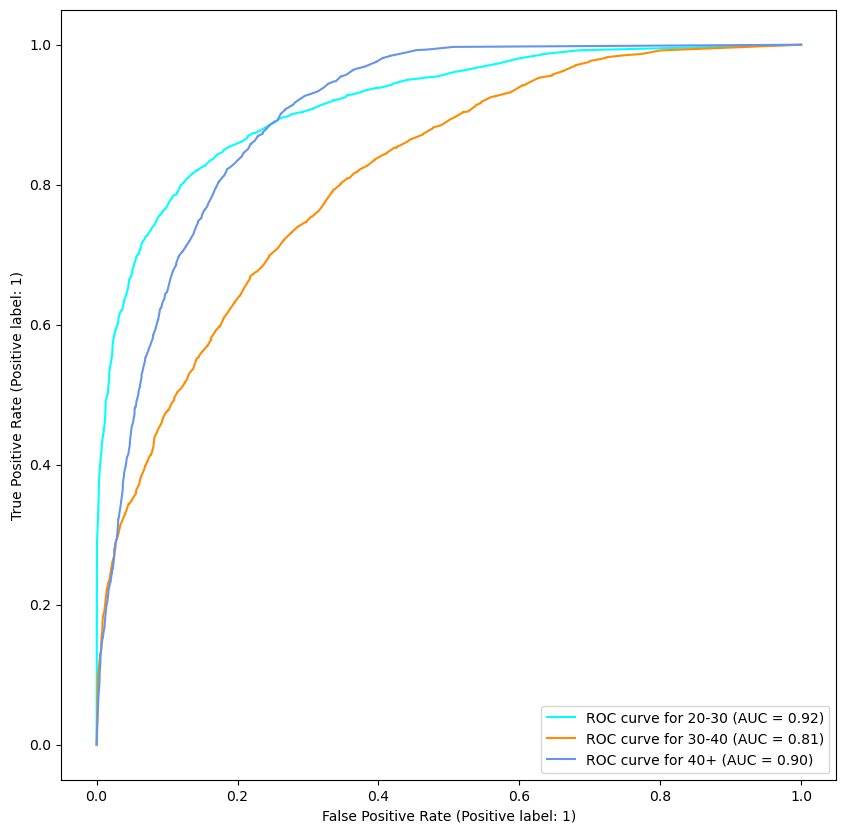

In [29]:

fig, ax = plt.subplots(figsize=(10, 10))
target_names = ['20-30', '30-40', '40+']
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

In [30]:
from sklearn import svm
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size= 0.2, random_state = 2024)

model_1 = svm.SVC(random_state=0).fit(X_train, y_train[:, 0])
model_2 = svm.SVC(random_state=0).fit(X_train, y_train[:, 1])
model_3 = svm.SVC(random_state=0).fit(X_train, y_train[:, 2])

In [31]:
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(X_test, y_test[:, 0])}")
print(f"model 2 - {model_2.score(X_test, y_test[:, 1])}")
print(f"model 3 - {model_3.score(X_test, y_test[:, 2])}")

Model Accuracy :
model 1 - 0.809515746698273
model 2 - 0.6681341009143245
model 3 - 0.6801557737893668


In [32]:
model = OneVsRestClassifier(svm.SVC(random_state=0)).fit(X_train, y_train)
prob_test_vec = model.predict_proba(X_test)
 
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

AttributeError: This 'OneVsRestClassifier' has no attribute 'predict_proba'

In [34]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size= 0.2, random_state = 2024)

model_1 = GaussianNB().fit(X_train, y_train[:, 0])
model_2 = GaussianNB().fit(X_train, y_train[:, 1])
model_3 = GaussianNB().fit(X_train, y_train[:, 2])


In [35]:
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(X_test, y_test[:, 0])}")
print(f"model 2 - {model_2.score(X_test, y_test[:, 1])}")
print(f"model 3 - {model_3.score(X_test, y_test[:, 2])}")

Model Accuracy :
model 1 - 0.7903826616999662
model 2 - 0.5909244835760243
model 3 - 0.6178462580426685


In [37]:
model = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
prob_test_vec = model.predict_proba(X_test)
 
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

[0.7843828145661214, 0.6291935736540704, 0.7393755755251551]

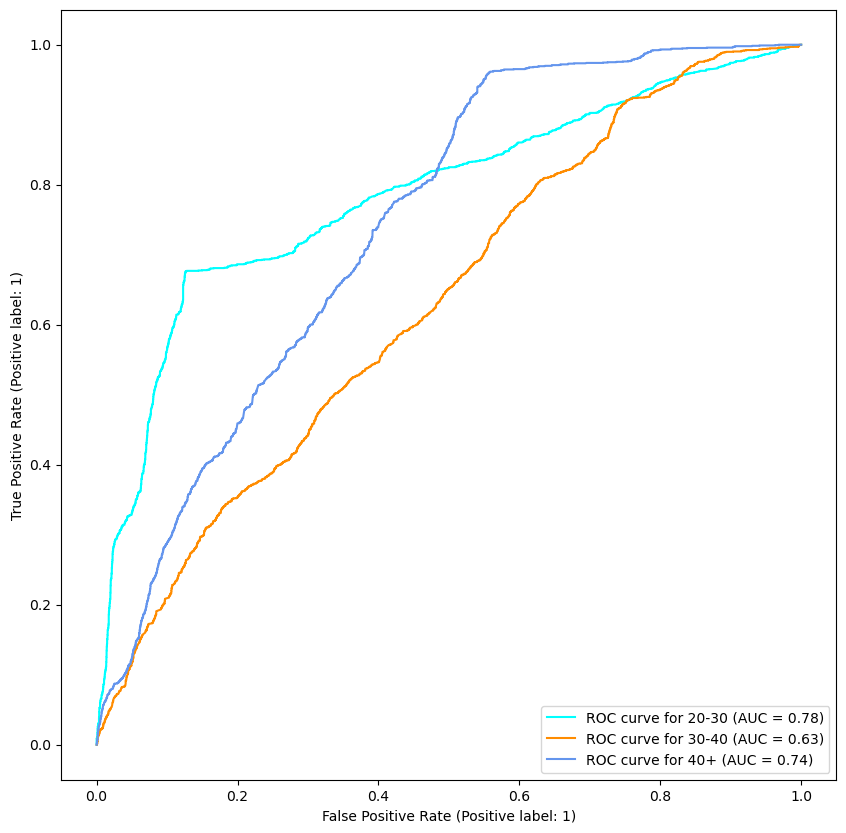

In [38]:

fig, ax = plt.subplots(figsize=(10, 10))
target_names = ['20-30', '30-40', '40+']
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size= 0.2, random_state = 2024)

model_1 = LinearDiscriminantAnalysis().fit(X_train, y_train[:, 0])
model_2 = LinearDiscriminantAnalysis().fit(X_train, y_train[:, 1])
model_3 = LinearDiscriminantAnalysis().fit(X_train, y_train[:, 2])

In [40]:
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(X_test, y_test[:, 0])}")
print(f"model 2 - {model_2.score(X_test, y_test[:, 1])}")
print(f"model 3 - {model_3.score(X_test, y_test[:, 2])}")

Model Accuracy :
model 1 - 0.817135116830342
model 2 - 0.6806637317981713
model 3 - 0.724009481882831


In [41]:
model = OneVsRestClassifier(LinearDiscriminantAnalysis()).fit(X_train, y_train)
prob_test_vec = model.predict_proba(X_test)
 
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

[0.8618332378609698, 0.6559451306975285, 0.8049013298719244]

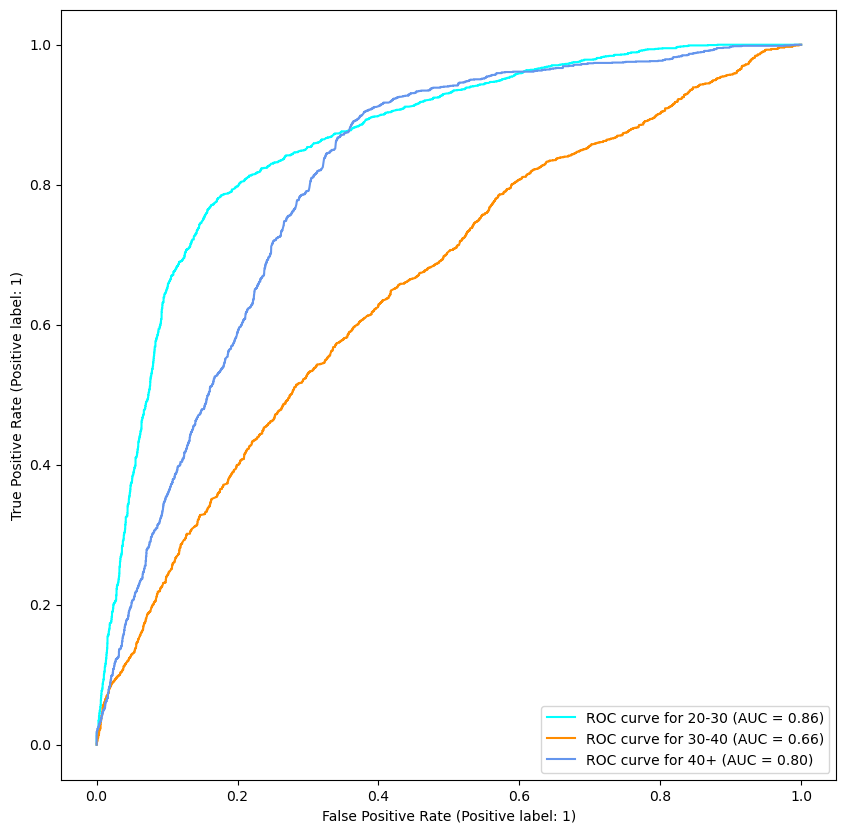

In [42]:

fig, ax = plt.subplots(figsize=(10, 10))
target_names = ['20-30', '30-40', '40+']
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size= 0.2, random_state = 2024)

model_1 = GradientBoostingClassifier().fit(X_train, y_train[:, 0])
model_2 = GradientBoostingClassifier().fit(X_train, y_train[:, 1])
model_3 = GradientBoostingClassifier().fit(X_train, y_train[:, 2])

In [44]:
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(X_test, y_test[:, 0])}")
print(f"model 2 - {model_2.score(X_test, y_test[:, 1])}")
print(f"model 3 - {model_3.score(X_test, y_test[:, 2])}")

Model Accuracy :
model 1 - 0.8596342702336607
model 2 - 0.7433118862174061
model 3 - 0.7871655943108703


In [45]:
model = OneVsRestClassifier(GradientBoostingClassifier()).fit(X_train, y_train)
prob_test_vec = model.predict_proba(X_test)
 
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

[0.9094175317892339, 0.769395884544446, 0.8739529244739963]

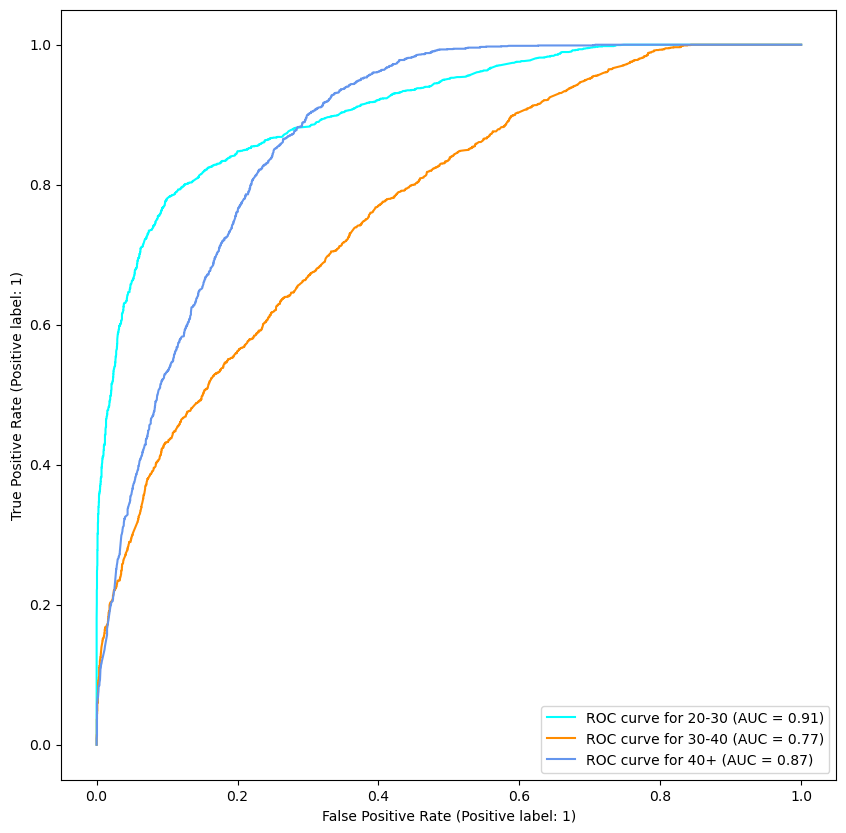

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
target_names = ['20-30', '30-40', '40+']
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )